In [69]:
# names = ['x-axis (g)', 'y-axis (g)', 'z-axis (g)','x-axis (g).1','y-axis (g).1','z-axis (g).1','x-axis (g).2','y-axis (g).2','z-axis (g).2',
#         'x-axis (g).3','y-axis (g).3','z-axis (g).3', 'x-axis (g).4','y-axis (g).4','z-axis (g).4','Unnamed: 40']
# _sensor_df = pd.DataFrame(sensor_df,columns=names)
# print(_sensor_df.head())

In [125]:
# file_path = os.path.join(os.environ["HOME"], "fall_detection_actions/Data_fall2/HAR_UP/Annot1/Subject1_Activity1_Trial1_camera1.csv")

# with open(file_path, mode='r') as file:
#     for i in range(5):  # 最初の5行を表示
#         print(file.readline())

In [126]:
#これだと’Trialのデータの中身が1,7なのでヘッダーがずれてうまく処理できない’
# import pandas as pd
# import os

# # CSVファイルのパス
# file_path = os.path.join(os.environ["HOME"], "fall_detection_actions/Data_fall2/HAR_UP/Annot1/Subject1_Activity3_Trial1_camera1.csv")

# # 最初の2行を読み込む
# header_rows = pd.read_csv(file_path, sep=',', header=None, nrows=2)
# # print(header_rows)
# # ヘッダー行を作成し、重複を処理
# header = header_rows.iloc[1].fillna('').tolist()
# # print(header)

# # ヘッダー行を修正
# header1 = header_rows.iloc[0].fillna('').tolist()
# print(len(header1))
# header2 = header_rows.iloc[1].fillna('').tolist()
# print(len(header2))
# header = [f"{col1}_{col2}" if col1 and col2 else col1 or col2 for col1, col2 in zip(header1, header2)]
# print(len(header))
# header = [f"{name}_{i}" if header.count(name) > 1 else name for i, name in enumerate(header)]

# # ヘッダー行をスキップしてデータを読み込む
# sensor_df = pd.read_csv(file_path, sep=',', quotechar='"', header=None, skiprows=2, names=header)

# # データフレームの確認
# print(sensor_df.head())
# print("データフレームの形: ", sensor_df.shape)
# current_columns = sensor_df.columns
# print(current_columns)

In [127]:
# print(sensor_df[['TimeStamps', 'AnkleAccelerometer_x-axis (g)']].head())

In [2]:
import pandas as pd
import os

Annot_path = "HAR_UP/Annot6"
files = sorted(os.listdir(Annot_path))
# print(files)
for file in files:
    # print(file)
    file_path = f'{Annot_path}/{file}'
    print(file_path)
# # CSVファイルのパス
# file_path = os.path.join(os.environ["HOME"], "fall_detection_actions/Data_fall2/HAR_UP/Annot1/Subject1_Activity1_Trial1_camera1.csv")

    # 最初の2行を読み込む
    header_rows = pd.read_csv(file_path, sep=',', header=None, nrows=2)

    # ヘッダー行を修正
    header1 = header_rows.iloc[0].fillna('').tolist()
    header2 = header_rows.iloc[1].fillna('').tolist()

    # ヘッダーを結合
    header = [f"{col1}_{col2}" if col1 and col2 else col1 or col2 for col1, col2 in zip(header1, header2)]

    # 重複する列名を修正
    header = [f"{name}_{i}" if header.count(name) > 1 else name for i, name in enumerate(header)]

    # 'Trial'にカンマが含まれている場合は最後の列を調整
    if header[-1] == 'Trial':
        header[-1] = 'Trial_1'  # 例: 'Trial_1'
        header.append('Trial_2')  # 例: 'Trial_2'

    # ヘッダー行をスキップしてデータを読み込む
    sensor_df = pd.read_csv(file_path, sep=',', quotechar='"', header=None, skiprows=2, names=header)

    # データフレームの確認
    # print(sensor_df.head())
    # print("データフレームの形: ", sensor_df.shape)
    # print("列名: ", sensor_df.columns.tolist())
    sensor_df.columns = [
        'TimeStamps', 'AnkleAccelerometer_x-axis (g)', 'AnkleAccelerometer_y-axis (g)', 'AnkleAccelerometer_z-axis (g)',
        'AnkleAngularVelocity_x-axis (deg/s)', 'AnkleAngularVelocity_y-axis (deg/s)', 'AnkleAngularVelocity_z-axis (deg/s)',
        'AnkleLuminosity', 'RightPocketAccelerometer_x-axis (g)', 'RightPocketAccelerometer_y-axis (g)', 'RightPocketAccelerometer_z-axis (g)',
        'RightPocketAngularVelocity_x-axis (deg/s)', 'RightPocketAngularVelocity_y-axis (deg/s)', 'RightPocketAngularVelocity_z-axis (deg/s)',
        'RightPocketLuminosity', 'BeltAccelerometer_x-axis (g)', 'BeltAccelerometer_y-axis (g)', 'BeltAccelerometer_z-axis (g)',
        'BeltAngularVelocity_x-axis (deg/s)', 'BeltAngularVelocity_y-axis (deg/s)', 'BeltAngularVelocity_z-axis (deg/s)',
        'BeltLuminosity', 'NeckAccelerometer_x-axis (g)', 'NeckAccelerometer_y-axis (g)', 'NeckAccelerometer_z-axis (g)',
        'NeckAngularVelocity_x-axis (deg/s)', 'NeckAngularVelocity_y-axis (deg/s)', 'NeckAngularVelocity_z-axis (deg/s)',
        'NeckLuminosity', 'WristAccelerometer_x-axis (g)', 'WristAccelerometer_y-axis (g)', 'WristAccelerometer_z-axis (g)',
        'WristAngularVelocity_x-axis (deg/s)', 'WristAngularVelocity_y-axis (deg/s)', 'WristAngularVelocity_z-axis (deg/s)',
        'WristLuminosity', 'BrainSensor', 'Infrared1', 'Infrared2', 'Infrared3', 'Infrared4', 'Infrared5', 'Infrared6',
        'Subject', 'Activity', 'Trial_1','Trial_2'
    ]

    # 列名を設定した後に、データの表示
    # print(sensor_df.head())
    _sensor_df = pd.DataFrame(data=sensor_df, columns=['TimeStamps', 'AnkleAccelerometer_x-axis (g)', 'AnkleAccelerometer_y-axis (g)','AnkleAccelerometer_z-axis (g)',
                                                      'RightPocketAccelerometer_x-axis (g)','RightPocketAccelerometer_y-axis (g)','RightPocketAccelerometer_z-axis (g)',
                                                      'BeltAccelerometer_x-axis (g)','BeltAccelerometer_y-axis (g)','BeltAccelerometer_z-axis (g)','NeckAccelerometer_x-axis (g)',
                                                      'NeckAccelerometer_y-axis (g)','NeckAccelerometer_z-axis (g)','WristAccelerometer_x-axis (g)','WristAccelerometer_y-axis (g)',
                                                      'WristAccelerometer_z-axis (g)','Subject', 'Activity'])
    _sensor_df.to_csv(f"Sensor_HAR_UP/Annot6/sensor_{file}",index=False)

HAR_UP/Annot6/Subject6_Activity10_Trial1_camera1.csv
HAR_UP/Annot6/Subject6_Activity10_Trial1_camera2.csv
HAR_UP/Annot6/Subject6_Activity10_Trial2_camera1.csv
HAR_UP/Annot6/Subject6_Activity10_Trial2_camera2.csv
HAR_UP/Annot6/Subject6_Activity10_Trial3_camera1.csv
HAR_UP/Annot6/Subject6_Activity10_Trial3_camera2.csv
HAR_UP/Annot6/Subject6_Activity11_Trial1_camera1.csv
HAR_UP/Annot6/Subject6_Activity11_Trial1_camera2.csv
HAR_UP/Annot6/Subject6_Activity11_Trial2_camera1.csv
HAR_UP/Annot6/Subject6_Activity11_Trial2_camera2.csv
HAR_UP/Annot6/Subject6_Activity11_Trial3_camera1.csv
HAR_UP/Annot6/Subject6_Activity11_Trial3_camera2.csv
HAR_UP/Annot6/Subject6_Activity1_Trial1_camera1.csv
HAR_UP/Annot6/Subject6_Activity1_Trial1_camera2.csv
HAR_UP/Annot6/Subject6_Activity1_Trial2_camera1.csv
HAR_UP/Annot6/Subject6_Activity1_Trial2_camera2.csv
HAR_UP/Annot6/Subject6_Activity1_Trial3_camera1.csv
HAR_UP/Annot6/Subject6_Activity1_Trial3_camera2.csv
HAR_UP/Annot6/Subject6_Activity2_Trial1_camera1.csv


In [3]:
###################################
#concat skeleton and sensor
skeleton_df = pd.read_csv(os.path.join(os.environ["HOME"],"fall_detection_actions/Data_fall2/har30_6_new-pose+score.csv"))
sensor_df = pd.read_csv("Sensor_HAR_UP/sensor_har_6.csv")
add_df = pd.concat([skeleton_df,sensor_df.drop(columns=["TimeStamps","Subject","Activity"])],axis=1)
add_df.to_csv("har30_6_sensor_new-pose+score.csv",index=False)

In [17]:
###################################
#データ可視化
####################################

In [43]:
import pandas as pd

# CSVファイルからデータを読み取る
# ファイル形式: 時間, 加速度X, 加速度Y, 加速度Z
data = pd.read_csv("har30_1_sensor_new-pose+score.csv")

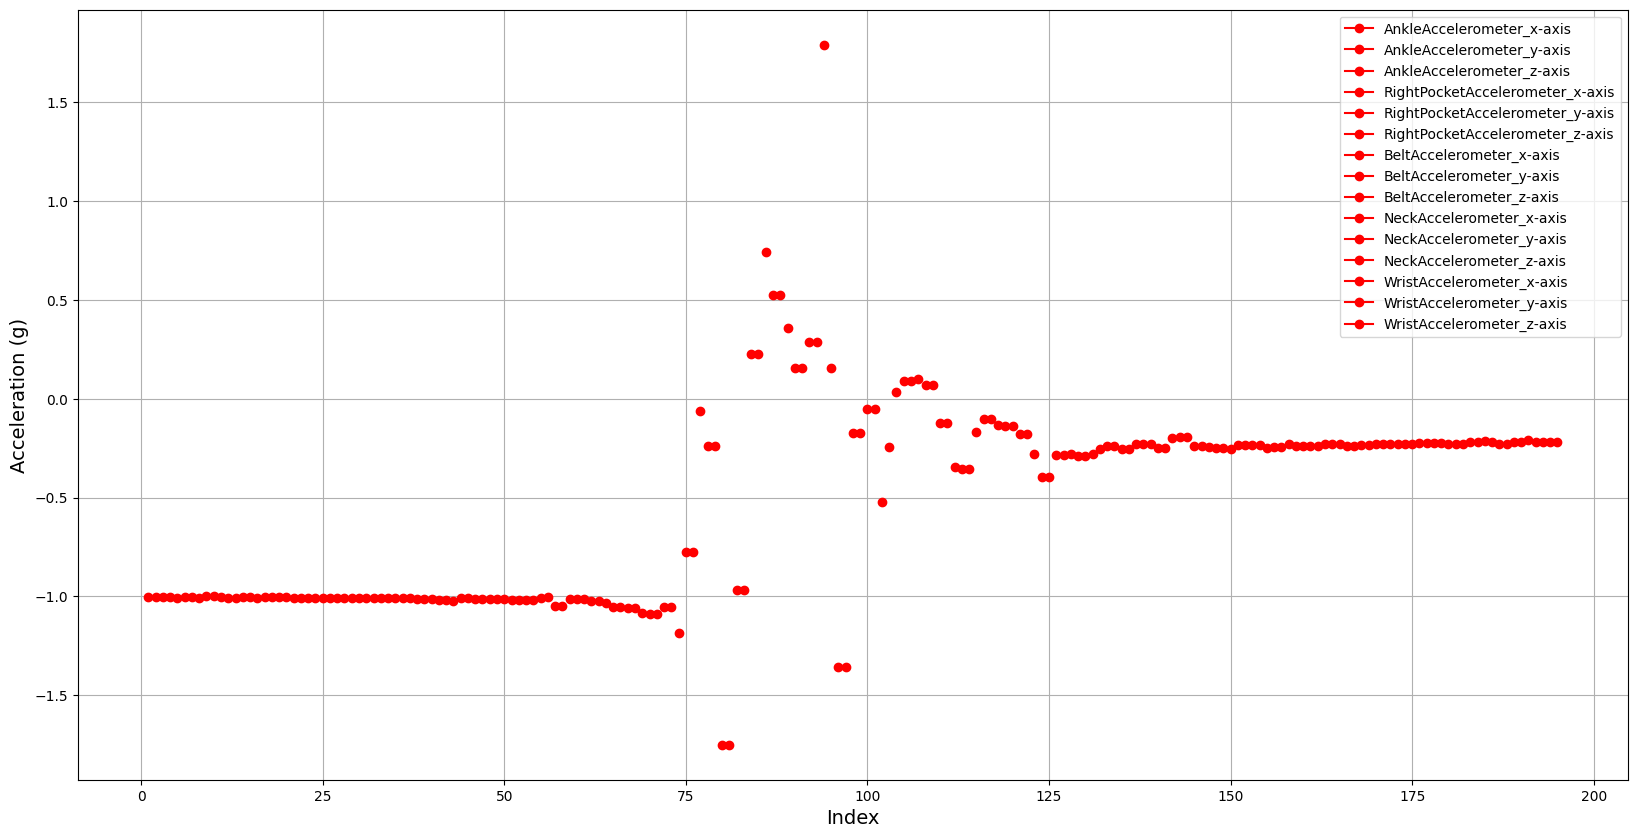

In [72]:
# データをプロット
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# print(data["video"])
# 特定の条件に一致するデータを抽出
target_data = data[data["video"] == "Subject1_Activity1_Trial1_camera1.avi"]
# print(target_data)
# for column_name in target_data:
#     print(column_name)
# 抽出したデータでループ
# for index, row in target_data.iterrows():
for i, (index, row) in enumerate(target_data.iterrows(), start=1):
    # print(row["AnkleAccelerometer_x-axis (g)"])#配列形式ではない
    # print(index)
    plt.plot([i], [row["AnkleAccelerometer_x-axis (g)"]], 
             label="AnkleAccelerometer_x-axis (g)", 
             color="r", marker="o",linestyle="-")
    # plt.plot([i], [row["AnkleAccelerometer_y-axis (g)"]], 
    #          label="AnkleAccelerometer_y-axis (g)", 
    #          color="g", marker="-o")
    # plt.plot([i], [row["AnkleAccelerometer_z-axis (g)"]], 
    #          label="AnkleAccelerometer_z-axis (g)", 
    #          color="b", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_x-axis (g)"]], 
    #          label="RightPocketAccelerometer_x-axis (g)", 
    #          color="coral", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_y-axis (g)"]], 
    #          label="RightPocketAccelerometer_y-axis (g)", 
    #          color="lime", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_z-axis (g)"]], 
    #          label="RightPocketAccelerometer_z-axis (g)", 
    #          color="aqua", marker="-o")
    # plt.plot([i], [row["BeltAccelerometer_x-axis (g)"]], 
    #          label="BeltAccelerometer_x-axis (g)", 
    #          color="fuchsia", marker="-o")
    # plt.plot([i], [row["BeltAccelerometer_y-axis (g)"]], 
    #          label="BeltAccelerometer_y-axis (g)", 
    #          color="yellowgreen", marker="-o")
    # plt.plot([i], [row["BeltAccelerometer_z-axis (g)"]], 
    #          label="BeltAccelerometer_z-axis (g)", 
    #          color="lightblue", marker="-o")
    # plt.plot([i], [row["NeckAccelerometer_x-axis (g)"]], 
    #          label="NeckAccelerometer_x-axis (g)", 
    #          color="purple", marker="-o")
    # plt.plot([i], [row["NeckAccelerometer_y-axis (g)"]], 
    #          label="RightPocketAccelerometer_y-axis (g)", 
    #          color="gold", marker="-o")
    # plt.plot([i], [row["NeckAccelerometer_z-axis (g)"]], 
    #          label="RightPocketAccelerometer_z-axis (g)", 
    #          color="navy", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_x-axis (g)"]], 
    #          label="RightPocketAccelerometer_x-axis (g)", 
    #          color="pink", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_y-axis (g)"]], 
    #          label="RightPocketAccelerometer_y-axis (g)", 
    #          color="orange", marker="-o")
    # plt.plot([i], [row["RightPocketAccelerometer_z-axis (g)"]], 
    #          label="RightPocketAccelerometer_z-axis (g)", 
    #          color="teal", marker="-o")
        
# plt.title("Ankle Accelerometer Data", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Acceleration (g)", fontsize=14)
plt.grid(True)
plt.legend(["AnkleAccelerometer_x-axis", "AnkleAccelerometer_y-axis","AnkleAccelerometer_z-axis",
            "RightPocketAccelerometer_x-axis","RightPocketAccelerometer_y-axis","RightPocketAccelerometer_z-axis",
            "BeltAccelerometer_x-axis","BeltAccelerometer_y-axis","BeltAccelerometer_z-axis",
            "NeckAccelerometer_x-axis","NeckAccelerometer_y-axis","NeckAccelerometer_z-axis",
            "WristAccelerometer_x-axis","WristAccelerometer_y-axis","WristAccelerometer_z-axis"])
plt.savefig("sensor_2.png")
plt.show()

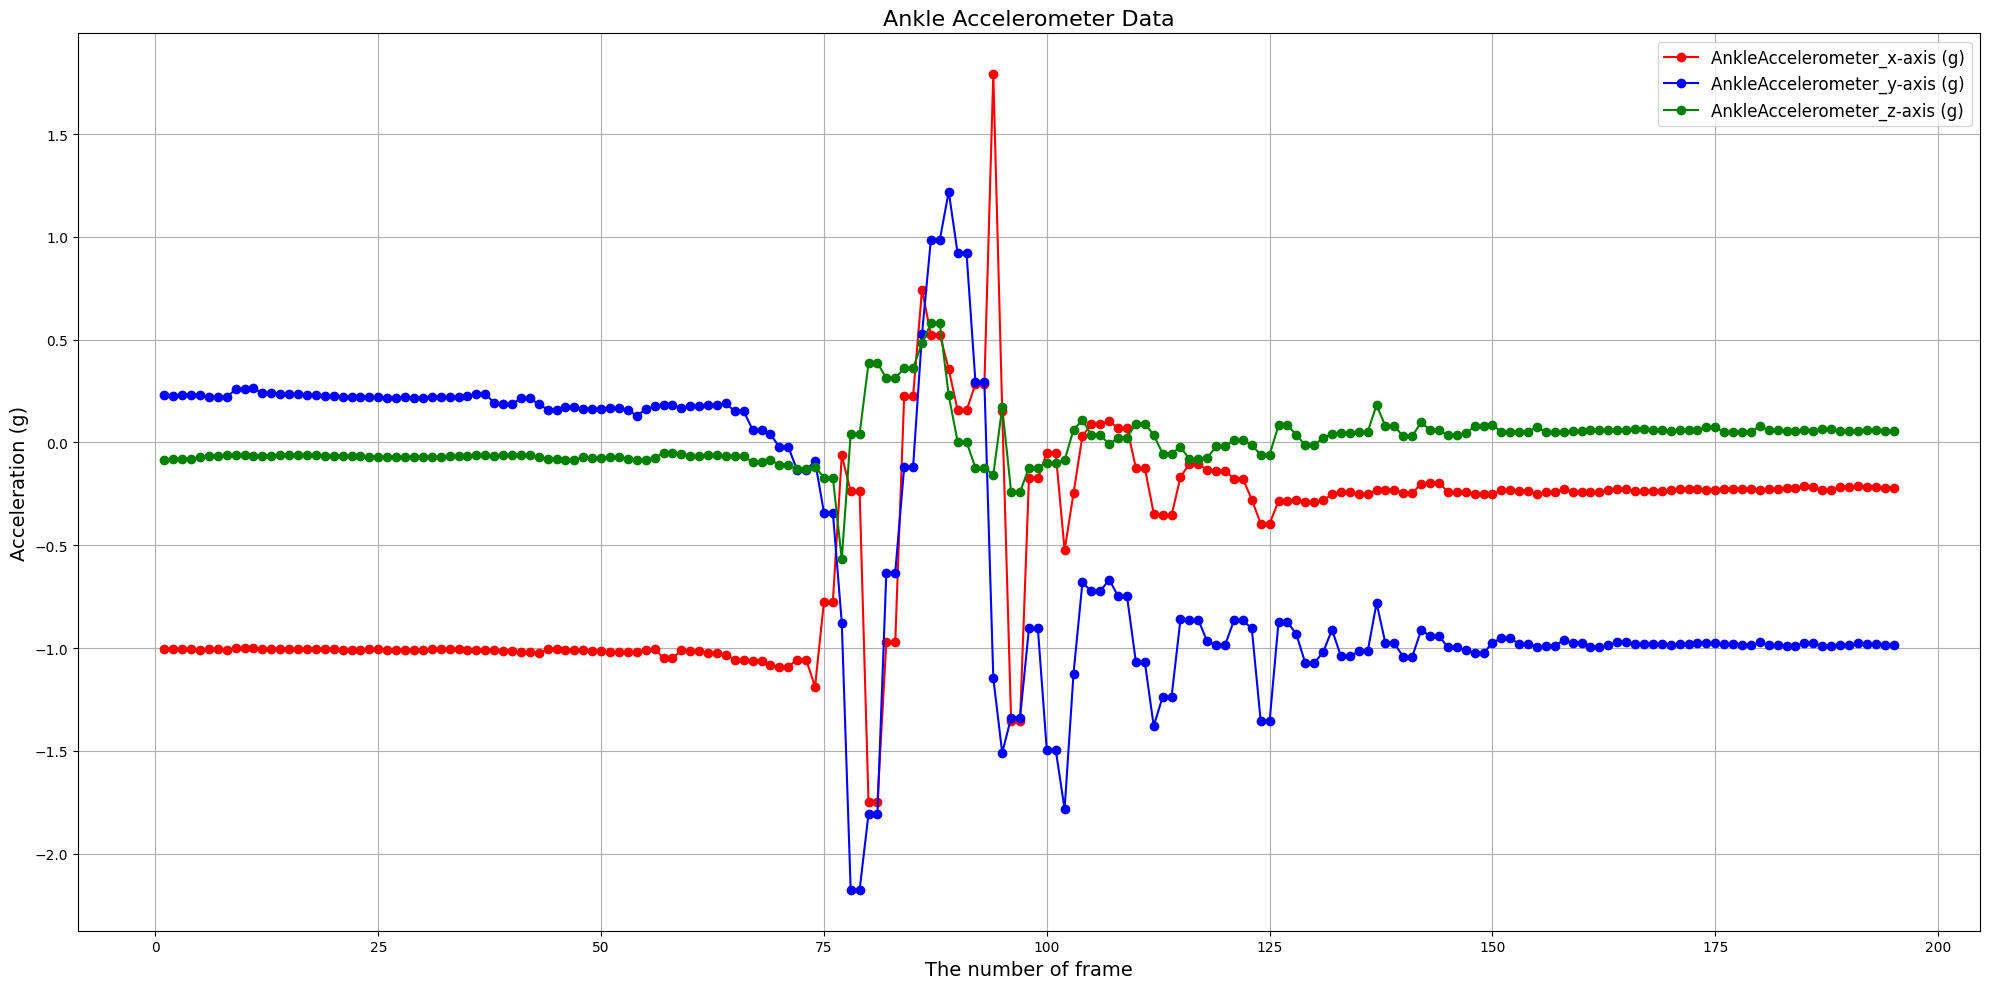

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# CSVファイルからデータを読み取る
# ファイル形式: 時間, 加速度X, 加速度Y, 加速度Z
data = pd.read_csv("har30_1_sensor_new-pose+score.csv")

# データをプロット
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
# print(data["video"])
# 特定の条件に一致するデータを抽出
target_data = data[data["video"] == "Subject1_Activity1_Trial1_camera1.avi"]
# データ収集用リスト
x_values = []
y_values = []
x1_values = []
y1_values = []
x2_values = []
y2_values = []
# データ収集
for i, (index, row) in enumerate(target_data.iterrows(), start=1):
    x_values.append(i)
    y_values.append(row["AnkleAccelerometer_x-axis (g)"])
for i, (index, row) in enumerate(target_data.iterrows(), start=1):
    x1_values.append(i)
    y1_values.append(row["AnkleAccelerometer_y-axis (g)"])
for i, (index, row) in enumerate(target_data.iterrows(), start=1):
    x2_values.append(i)
    y2_values.append(row["AnkleAccelerometer_z-axis (g)"])
# 一括描画
plt.plot(x_values, y_values, label="AnkleAccelerometer_x-axis (g)", color="r", marker="o", linestyle="-")
plt.plot(x1_values, y1_values, label="AnkleAccelerometer_y-axis (g)", color="b", marker="o", linestyle="-")
plt.plot(x2_values, y2_values, label="AnkleAccelerometer_z-axis (g)", color="g", marker="o", linestyle="-")
# グラフの装飾
plt.title("Ankle Accelerometer Data", fontsize=16)
plt.xlabel("The number of frame", fontsize=14)
plt.ylabel("Acceleration (g)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig("sensor_3.png")
# グラフを表示
plt.show()
